# CSC421 Fall 2021 Assignment 3 
### Author: George Tzanetakis 

This notebook is based on the topics covered in **Chapter 12 - Quantifying Uncertainty **, **Chapter 13 Probabilistic Reasoning** from the book *Artificial Intelligence: A Modern Approach.*  You are welcome and actually it can be educational to look at the code at the aima-code repository as well as other code resources you can find on the web. However, make sure you understand any code that you incoporate. 

The assignment structure is as follows - each item is worth 1 point: 

1. Snakes and ladder simulation (Basic) - basic rolling and movement simulation, no ladders/snakes 
2. Snakes and ladder simulation (Basic) - multiple simulations and recording of number of rolls 
3. Snakes and ladder simulation (Expected) - adding of user-specified ladders/snakes 
4. Snakes and ladder simulation (Expected) - simulation to determine probability distribution of number of rolls 
5. Snakes and ladder simulation (Advanced) - exact inference + simulation with different ending rules 
6. Naive Bayes text classsification (Basic) - conditional probabilities for dictionary words 
7. Naive Bayes text classification (Basic) - markdown equations for Bernoulli 
8. Naive Bayes text classification (Expected) - prediction of movie review polarity 
9. Naive Bayes text classification (Expected) - classification accuracy and confusion matrix 
10. Naive Bayes text classification (Advanced) - probabilitistic generation of movie reviews 

The grading will be done in 0.5 increments. 1 point for correct answer, 0.5 points for partial or incorrect 
but reasonable answer and 0.0 for no answer or completely wrong answer. 


# Introduction 

This question uses the board game of snakes and ladders to explore the concepts behind probability, 
stochastic simulation as well as exact and approximate inference. I assume that most of you are familiar 
with snakes and ladders. If you need a refresher check the following link: 

https://www.ymimports.com/pages/how-to-play-snakes-and-ladders




# Question 1 (Basic)  - 1 point

Your first task will be to write a simple movement simulator on a snakes and ladders board. 
For this question you can ignore the snakes and ladders and just simply assume you only 
have to deal with moving. You will need to simulate rolling the die - this can be done 
by using the Python *random* module and the *randint* method. Your function *play_game* 
will take as input the length of the board (an integer), "play" the game by rolling the die 
multiple times until the sum of rolls is larger or equal to the length of the board.  (note: 
this is one of the possible and simplest end rules). The function should return the total 
number of rolls required to finish the the particular game that was played. Obviously 
this number will vary as it depends on the specific random rolls performed during the movement 
simulation. 






In [3]:
# YOUR CODE GOES HERE 
import random 

def play_game(board_len):
    num_rolls = 0
    location = 0
    while location < board_len:
        roll = random.randint(1,6)
        location += roll
        num_rolls += 1
    return num_rolls

print(play_game(1))
print(play_game(10))
print(play_game(100))
print(play_game(1000))

    

1
4
27
277


# Question 2 (Basic) - 1 point

Your next task is to collect information about the probability distribution of number of rolls using the *play_game* function you implemented in the previous subquestion. Simulate playing the game 1000 times with a board length of 100 and record the number of rolls for each simulation. Show the histogram of the number of rolls for this simulation. You don't need to plot the histogram but can simply show the counts for each number of rolls as text. You can also create a plot using either the *matplotlib* or *bokeh* plotting frameworks. Make sure you include appropriate pip install and import statements in your notebook and check that it works in the Jupyterhub of the course. 



In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


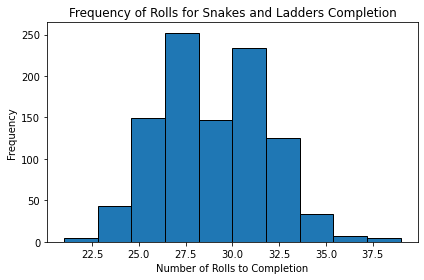

In [5]:
# YOUR CODE GOES HERE 
import numpy as np
from matplotlib import pyplot as plt


def game_simulation(num_sims, board_len):
    num_rolls = []
    for i in range(num_sims):
        num_rolls.append(play_game(board_len))
    return num_rolls


def plot_stats(stats):
    plt.hist(stats, edgecolor ='black')
    plt.title('Frequency of Rolls for Snakes and Ladders Completion')
    plt.xlabel('Number of Rolls to Completion')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    
plot_stats(game_simulation(1000,100))

# Question 3 (Expected) 1 point 

Extent your *play_game* method to take as input a specification of snake and ladder positions and then perform the appropriate movement simulation. Just as before playing the game returns the number of rolls required to finish the game using the same simple end rule as the previous subquestions. 

<img src="snakes_ladders.png" width="50%"/>

The snake and ladders positions will be encoded as a list of tuples. If the first number of the tuple is smaller than the second one it is ladder otherwise it is a snake. For example two of the snakes and one of the ladders
in the board above would be represented as: 

In [6]:
snakeA = (34,6)
snakeB = (32,10)
ladderC = (1,38)
snake_ladder_list = [snakeA,snakeB,ladderC]
print(snake_ladder_list)

[(34, 6), (32, 10), (1, 38)]


Your play game function should take as input the snake and ladder specification. For testing and experiments use the board provided in the image above. 

In [7]:
# YOUR CODE GOES HERE 
import random 

def is_snake(tup):
    if tup[0] > tup[1]:
        return True
    return False

def get_tup(loc, sl_list):
    for i in sl_list:
        if i[0] == loc:
            temp = i
            return temp
        continue 
    return 0
    

def is_loc_sl(loc, sl_list):
    for i in sl_list:
        if i[0] == loc:
            return True
        pass
    return False
    
def play_game(board_len, sl_list):
    num_rolls = 0
    location = 0
    while location < board_len:
        roll = random.randint(1,6)
        location += roll
        num_rolls += 1
        if is_loc_sl(location, sl_list):
            sl_loc = get_tup(location, sl_list)
            if is_snake(sl_loc):
                location = sl_loc[1]
                continue 
            else:
                location = sl_loc[1]
                continue 
        else:
            continue 
    return num_rolls 


for i in range(10):
    print('{} rolls to complete snake and ladders with snake and ladder list.'.format(play_game(100, snake_ladder_list)))


28 rolls to complete snake and ladders with snake and ladder list.
36 rolls to complete snake and ladders with snake and ladder list.
26 rolls to complete snake and ladders with snake and ladder list.
35 rolls to complete snake and ladders with snake and ladder list.
46 rolls to complete snake and ladders with snake and ladder list.
19 rolls to complete snake and ladders with snake and ladder list.
28 rolls to complete snake and ladders with snake and ladder list.
28 rolls to complete snake and ladders with snake and ladder list.
31 rolls to complete snake and ladders with snake and ladder list.
32 rolls to complete snake and ladders with snake and ladder list.


# QUESTION 4 (EXPECTED) - 1 point

Use the full game simulation that incoprorates the snakes and ladders, simulate 1000 games and record 
probability distribution of the number of rolls as a histogram similarly to the previous subquestion. 
Modify your code to support the following additional ending variations: 

* Exact landing: the piece needs to end exactly at the last square. If the roll exceeds the square then it is discarded but counted for the number of rolls 
* Bounce back variation:  If the roll is too high, the player's piece will bounce off the last space and move back. For example, if a player had four spaces to get to 100 and rolled a 6, the piece will move four spaces to 100, then “bounce back" two spaces to 98.


Show the histogram of the number of rolls for each ending variation. 

With exact game play


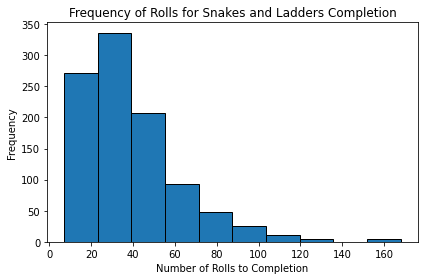

With bounceback gameplay


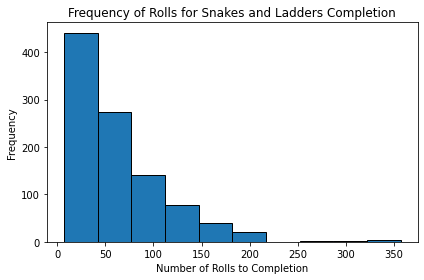

No specific gameplay


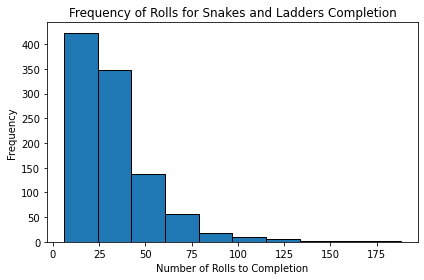

In [8]:
# YOUR CODE GOES HERE
import random 

def is_snake(tup):
    if tup[0] > tup[1]:
        return True
    return False


def get_tup(loc, sl_list):
    for i in sl_list:
        if i[0] == loc:
            temp = i
            return temp
        continue 
    return 0
    

def is_loc_sl(loc, sl_list):
    for i in sl_list:
        if i[0] == loc:
            return True
        pass
    return False


def bounceback(loc, board_len, sl_list):
    diff = loc - board_len
    new_loc = board_len - diff
    if is_loc_sl(new_loc, sl_list):
        tup = get_tup(new_loc, sl_list)
        if is_snake(tup):
            new_loc = tup[1]
            return new_loc
        else:
            new_loc = tup[1]
            return new_loc
    return new_loc
    
    
    
def play_game(board_len, sl_list, game_type = None ):
    num_rolls = 0
    location = 0
    
    if(game_type == 'bounceback'):
        while location != board_len:
            roll = random.randint(1,6)
            location += roll
            num_rolls += 1
            if location > board_len:
                location = bounceback(location, board_len, sl_list)
                continue
            elif is_loc_sl(location, sl_list):
                sl_loc = get_tup(location, sl_list)
                if is_snake(sl_loc):
                    location = sl_loc[1]
                    continue 
                else:
                    location = sl_loc[1]
                    continue 
            else:
                continue 
        return num_rolls 

    elif(game_type == 'exact'):
        while location != board_len:
            roll = random.randint(1,6)
            if location + roll > board_len:
                num_rolls +=1 
                continue 
            else:
                location += roll
                num_rolls += 1
                if is_loc_sl(location, sl_list):
                    sl_loc = get_tup(location, sl_list)
                    if is_snake(sl_loc):
                        location = sl_loc[1]
                        continue 
                    else:
                        location = sl_loc[1]
                        continue 
                else:
                    continue 
        return num_rolls  
   
    else:
        while location < board_len:
            roll = random.randint(1,6)
            location += roll
            num_rolls += 1
            if is_loc_sl(location, sl_list):
                sl_loc = get_tup(location, sl_list)
                if is_snake(sl_loc):
                    location = sl_loc[1]
                    continue 
                else:
                    location = sl_loc[1]
                    continue 
            else:
                continue 
        return num_rolls 

#----------------

snake_ladder_list = [(62, 18), (97, 78), (95, 56), (88, 24), (36, 6), (48, 26), (32, 10),
                     (80, 99), (21, 42), (1, 38), (71, 92), (28, 76), (50, 67), (8, 30), (4, 14)]

        
def game_simulation(num_sims, board_len, snake_ladder_list, gt):
    num_rolls = []
    for i in range(num_sims):
        num_rolls.append(play_game(board_len, snake_ladder_list, gt))
    return num_rolls


def plot_stats(stats):
    plt.hist(stats, edgecolor ='black')
    plt.title('Frequency of Rolls for Snakes and Ladders Completion')
    plt.xlabel('Number of Rolls to Completion')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print('With exact game play')
plot_stats(game_simulation(1000,100, snake_ladder_list, 'exact'))  
print('With bounceback gameplay')
plot_stats(game_simulation(1000,100, snake_ladder_list, 'bounceback'))  
print('No specific gameplay')
plot_stats(game_simulation(1000,100, snake_ladder_list, ''))  

# QUESTION 5 (ADVANCED) - 1 point 

In this question the goal is to perform exact probabilistic inference for the number of rolls. Rather than simulating the game and recording the number of moves you will need to compute systematically the probabilities of every possible sequence of rolls. You should use the simplified version of board movement with no snakes and ladders and the simple landing rule. As an example let's consider a very short board of 4 squares. The only sequence of 1 roll that finishes the game is rolling a 4 which has $P(4) = 1/6$. For two rolls we have more possibilities such as 1,3 or 3,1 or 2,2 or 2,3 or 3,2 etc. For example the probability of (1,3) is $P(1,3) = 1/6 * 1/6$. Your code should systematically calculate the right products and sums to come up with probabilities for 
each possible number of rolls. To make this a bit simpler consider a board of length $25$. I advise that you first start by looking at very short boards and checking some of the calculations by hand. 

Compare the results you get from exact inference with the results you get from approximate inference for the same board length. 

In [9]:
# YOUR CODE GOES HERE 
import random 

location = {i:1 for i in range(1,26)}


def compute_game_pr(loc, boardlen):
    
    roll = random.randint(1,6)
    
    if roll + loc >= boardlen:
        location[boardlen] =1/6
        return 
    else:
        location[roll+loc] = 1/6
        compute_game_pr(roll+loc, boardlen)

compute_game_pr(0, 25)

print(location)
product = 1
for k,v in location.items():
    if location[k] != 1:
        product *= v
    else:
        continue 
        
print(product*100)

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0.16666666666666666, 7: 1, 8: 1, 9: 0.16666666666666666, 10: 1, 11: 0.16666666666666666, 12: 1, 13: 1, 14: 0.16666666666666666, 15: 1, 16: 1, 17: 0.16666666666666666, 18: 1, 19: 1, 20: 1, 21: 0.16666666666666666, 22: 1, 23: 0.16666666666666666, 24: 1, 25: 0.16666666666666666}
5.953741807651271e-05


# Extra ideas (no credit) 

* Implement a GUI for showing the snakes/ladders board and support multiple players 


# Text Categorization


Text categorization is the task of assigning a given document to one of a fixed set of categories, on the basis of text it contains. Naive Bayes models are often used for this task. In these models, the query variable is
the document category, and the effect variables are the presence/absence
of each word in the language; the assumption is that words occur independently in documents within a given category (condititional independence), with frequencies determined by document category. Download the following file: http://www.cs.cornell.edu/People/pabo/movie-review-data/review_polarity.tar.gz containing a dataset that has been used for text mining consisting of movie reviews classified into negative and positive. You
will see that there are two folders for the positivie and negative category and they each contain multiple text files with the reviews. You can find more information about the dataset at: 
http://www.cs.cornell.edu/People/pabo/movie-review-data/


Our goal will be to build a simple Naive Bayes classifier for this dataset. More complicated approaches using term frequency and inverse document frequency weighting and many more words are possible but the basic concepts
are the same. The goal is to understand the whole process so DO NOT use existing machine learning packages but rather build the classifier from scratch.

Our feature vector representation for each text file will be simply a binary vector that shows which of the following words are present in the text file: Awful Bad Boring Dull Effective Enjoyable Great Hilarious. For example the text file cv996 11592.txt would be represented as (0, 0, 0, 0, 1, 0, 1, 0) because it contains Effective and Great but none of the other words.

# Question 6 (Basic) -1 point

Write code that parses the text files and calculates the probabilities for each dictionary word given the review polarity


In [11]:
# YOUR CODE GOES HERE 
#requires the files neg.zip and pos.zip to be in the same directory as the notebook file. It will grab from the 
#files if they are there. 
#this block must be run before 8,9 as it unzips the files that are worked with. The files unzip into the current working 
#directory as ./pos/pos/ and  ./neg/neg/ from there, each individual file can be worked with for the following problems. 
import os 
import zipfile

words = ['awful', 'bad', 'boring', 'dull', 'effective', 'great', 'hilarious']

#extracts the zip files so questions 6,8,9 can be run 
def env_setup(path, new_path):
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(new_path)

        
def vector_classification(target_words, folder, print_out = None):
    wc_dict = {k:0 for k in target_words}
    bin_vectors = []
    for filename in os.listdir(folder):
        if filename.endswith('.txt'):
            bin_vector = [0 for i in range(len(target_words))]
            try:
                with open(os.path.join(folder, filename), 'r') as f:
                    for line in f:
                        for word in line.split():
                            if word in target_words:
                                bin_vector[target_words.index(word)] = 1
                            else:
                                pass
                    bin_vectors.append(tuple(bin_vector))
            except IsADirectoryError:
                print('The given directory {} or {} is not in this directory.'.format(folder, filename))
                continue
            except FileNotFoundError:
                print('The file is not in this directory.')
                continue 
        else:
            continue 
    
    for i in bin_vectors:
        count = 0
        for j in i:
            if j == 1:
                wc_dict[words[count]] += 1
                count += 1
                continue 
            else: 
                count += 1
                continue 
    
    if print_out == True:
        print('Probability of words occuring in the {} polarity reviews:\n'.format(folder))
        for k,v in wc_dict.items():
            print('{} can be found in {} of {} {} polarity reviews for a probability of: {:.2f}%\n'
                   .format(k, v, len(bin_vectors), folder ,(v/len(bin_vectors))*100))
        return
    else: 
        return wc_dict


path = './pos.zip'
new_path = './pos'
env_setup(path, new_path)
path = './neg.zip'
new_path = './neg'
env_setup(path, new_path)

vector_classification(words, './pos/pos/', True)
vector_classification(words, './neg/neg/', True)






Probability of words occuring in the ./pos/pos/ polarity reviews:

awful can be found in 19 of 1000 ./pos/pos/ polarity reviews for a probability of: 1.90%

bad can be found in 255 of 1000 ./pos/pos/ polarity reviews for a probability of: 25.50%

boring can be found in 48 of 1000 ./pos/pos/ polarity reviews for a probability of: 4.80%

dull can be found in 23 of 1000 ./pos/pos/ polarity reviews for a probability of: 2.30%

effective can be found in 120 of 1000 ./pos/pos/ polarity reviews for a probability of: 12.00%

great can be found in 408 of 1000 ./pos/pos/ polarity reviews for a probability of: 40.80%

hilarious can be found in 125 of 1000 ./pos/pos/ polarity reviews for a probability of: 12.50%

Probability of words occuring in the ./neg/neg/ polarity reviews:

awful can be found in 101 of 1000 ./neg/neg/ polarity reviews for a probability of: 10.10%

bad can be found in 505 of 1000 ./neg/neg/ polarity reviews for a probability of: 50.50%

boring can be found in 169 of 1000 ./neg

# Question 7 (Basic)  - 1 point 

Explain how the probability estimates for each dictionary word given the review polarity can be combined to form a Naive Bayes classifier. You can look up Bernoulli Bayes model for this simple model where only presence/absence of a word is modeled.

Your answer should be a description of the process with equations and a specific example as markdown text NOT python code. You will write the code in the next question. 

# YOUR CODE GOES HERE 
P(word | polarity) = P(polarity | word) * P(word) / P(polarity) => 

P(word | polarity) * P(polarity) / P(word) = P(polarity | word)

We need to find the likleyhood of each word given that the polatriy is positive or negative. This will require checking all of the vector input data , and if there is a 1 in the vector then the probablity is the probability that was calculated and if there is a 0, it is the 1-(the probability that that word occurs given the polarity). These are multiplied together to ge the final product which is the Bernoulli Bayes classification model based on the presence or abscenece of a word. 

$P(polarity | word) = \Sigma_{i = 1}^{n}   P(word_i | polarity) *  \Sigma_{j = 1}^{k} 1 - P(word_j | polatiry) $ 

where i and j are the words who are present and not present respectivley. 


# QUESTION 8 (EXPECTED) 1 point

Write Python code for classifying a particular test instance (in our case movie review) following a Bernolli Bayes approach. Your code should calculate the likelihood the review is positive given the correspondng conditional probabilities for each dictionary word as well as the likelihood the review is negative given the corresponding conditional probabilities for each dictionary word. Check that your code works by providing a few example cases of prediction. Your code should be written from "scratch" and only use numpy/scipy but **NOT** machine learning libraries like scikit-learn or tensorflow.



In [12]:
# YOUR MARKDOWN GOES HERE 
#Assumes a path for the random file is given and like before, that the folders containing ./pos/pos and ./neg/neg are in the 
#assignment folder with the notebook.
import os

words = ['awful', 'bad', 'boring', 'dull', 'effective', 'great', 'hilarious']


def likelyhood_calc(prob_dict1, prob_dict2, txt, word_list, print_out = None):
    bin_vector = [0 for i in range(len(word_list))] 
    prob_product1 = 1.0
    prob_product2 = 1.0
    #get the file text and convert to binary representation of key_words
    try:
        with open(os.path.join(txt), 'r') as f:
            for line in f:
                for word in line.split():
                    if word in word_list:
                        bin_vector[word_list.index(word)] = 1
    except FileNotFoundError:
        print('Given random file not found. ')
        return -1 
    
    except IsADirectoryError as k:
        print(k, ' is not a file.')
        return -1 

    #positive calculation i = index of the word j = presence or not 
    for i,j  in enumerate(bin_vector):
        if j == 1:
            probability = prob_dict1[str(word_list[i])]/1000
        else:
            probability = 1 - (prob_dict1[str(word_list[i])]/1000)
        prob_product1 *= probability 
  
    #negative calculation 
    for i,j  in enumerate(bin_vector):
        if j == 1:
            probability = prob_dict2[str(word_list[i])]/1000
        else:
            probability = 1 - (prob_dict2[str(word_list[i])]/1000)
        prob_product2 *= probability 
  

    if print_out == True:
        print('The probability that {} is positive is: {:.2f} % and the probabilty it is negative is: {:.2f} %.'
              .format(txt, prob_product1 *100, prob_product2*100))
        if prob_product1 > prob_product2:
            print('It is more likley that the given file is a positive review.')
        else:
            print('It is more likley that the given file is a negative review.')
        return
    else:
        return (prob_product1, prob_product2)

    
    
    
pos_dict = vector_classification(words, './pos/pos/', '')
neg_dict = vector_classification(words, './neg/neg/', '')  
print('Testing random files for Bernoulli Bayes Naiive classifier. \n')
likelyhood_calc(pos_dict, neg_dict, './neg/neg/cv000_29416.txt', words, True)
print('\n')
likelyhood_calc(pos_dict, neg_dict, './pos/pos/cv558_29507.txt', words, True)
print('\n')
likelyhood_calc(pos_dict, neg_dict, './neg/neg/cv641_13412.txt', words, True)
print('\n')
likelyhood_calc(pos_dict, neg_dict, './pos/pos/cv803_8207.txt', words, True)
print('\n')
likelyhood_calc(pos_dict, neg_dict, './neg/neg/cv022_14227.txt', words, True)
    


Testing random files for Bernoulli Bayes Naiive classifier. 

The probability that ./neg/neg/cv000_29416.txt is positive is: 10.61 % and the probabilty it is negative is: 22.19 %.
It is more likley that the given file is a negative review.


The probability that ./pos/pos/cv558_29507.txt is positive is: 21.36 % and the probabilty it is negative is: 8.71 %.
It is more likley that the given file is a positive review.


The probability that ./neg/neg/cv641_13412.txt is positive is: 3.05 % and the probabilty it is negative is: 0.46 %.
It is more likley that the given file is a positive review.


The probability that ./pos/pos/cv803_8207.txt is positive is: 21.36 % and the probabilty it is negative is: 8.71 %.
It is more likley that the given file is a positive review.


The probability that ./neg/neg/cv022_14227.txt is positive is: 10.61 % and the probabilty it is negative is: 22.19 %.
It is more likley that the given file is a negative review.


# QUESTION 9 (EXPECTED) 1 point 


Calculate the classification accuracy and confusion matrix that you would obtain using the whole data set for both training and testing. Do not use machine learning libraries like scikit-learn or tensorflow for this only the basic numpy/scipy stuff.




In [13]:
# YOUR CODE GOES HERE 
import os 

words = ['awful', 'bad', 'boring', 'dull', 'effective', 'great', 'hilarious']

def find_confusion_matrix(path1, path2, word_list):
    word_dict_pos = vector_classification(word_list, path1, '')
    word_dict_neg = vector_classification(word_list, path2, '')

    #calculate the likelihoods in the positive/negative folders
    pos_list = []
    neg_list = []
    for filename in os.listdir(path1):
        val = likelyhood_calc(word_dict_pos, word_dict_neg, path1+'/'+filename, word_list, '')
        if val == -1:
            continue 
        else:
            pos_list.append(val)
            continue 
    for filename in os.listdir(path2):
        val = likelyhood_calc(word_dict_pos, word_dict_neg, path2+'/'+filename, word_list, '')
        if val == -1:
            continue
        else:
            neg_list.append(val)
            continue 
    
    #determine how many false positves there are in each list of tuples containing the likelihoods 
    #given which reveiw polarity folder it came from
    confusion_matrix = []

    correct_pos = 0
    pos_count = 0
    for i in pos_list:
        if i[0] > i[1]:
            correct_pos += 1
            pos_count += 1
        else:
            pos_count += 1
    neg_count = 0
    correct_neg = 0
    for i in neg_list:
        if i[1] > i[0]:
            correct_neg +=1 
            neg_count += 1
        else:
            neg_count += 1
    
    #add values to confusion matrix where;  [[predicted pos, predicted neg], [actual pos, actual neg]]
    predicted = [pos_count, neg_count]
    actual = [correct_pos, correct_neg]
    confusion_matrix.append(predicted)
    confusion_matrix.append(actual)
    print('The accuracy of the classification is {:.2f} % for positive reveiws and {:.2f} % for negative reviews.'
          .format((confusion_matrix[1][0]/confusion_matrix[0][0])*100, (confusion_matrix[1][1]/confusion_matrix[0][1])*100))
    print('For a total accuracy of {:.2f} %'.format(((actual[0]+actual[1])/2000)*100))
    print('With false positive of: {:.2f}%, false negative of: {:.2f}%, true positive of: {:.2f}%, and true negative of: {:.2f}%'
            .format(((confusion_matrix[0][0] - confusion_matrix[1][0])/confusion_matrix[0][0])*100, 
                   ((confusion_matrix[0][1] - confusion_matrix[1][1])/confusion_matrix[0][1])*100,
                   (confusion_matrix[1][0]/confusion_matrix[0][0])*100,
                   (confusion_matrix[1][1]/confusion_matrix[0][1])*100))
    
find_confusion_matrix('./pos/pos', './neg/neg', words)
    

The accuracy of the classification is 74.60 % for positive reveiws and 60.10 % for negative reviews.
For a total accuracy of 67.35 %
With false positive of: 25.40%, false negative of: 39.90%, true positive of: 74.60%, and true negative of: 60.10%


# QUESTION 10 (ADVANCED) 1 point 

One can consider the Naive Bayes classifier a generative model that can generate binary feature vectors using the associated probabilities from the training data. The idea is similar to how we do direct sampling in Bayesian Networks and depends on generating random number from a discrete distribution. Describe how you would generate random movie reviews consisting solely of the words from the dictionary using your model. Show 5 examples of randomly generated positive reviews and 5 examples of randomly generated negative reviews. Each example should consists of a subset of the words in the dictionary. Hint: use probabilities to generate both the presence and absence of a word. 


# Extra ideas (no credit) 

* Check the associated README file and see what convention is used for the 10-fold cross-validation. Calculate the classification accuracy and confusion matrix using the recommended 10-fold cross-validation. Again do NOT use 
ML libraries such as scikit-learn or tensorflow and just use numpy/scipy. 
* Implement the all the question using a ML library such as scikit-learn or tensorflow and a Naive Bayes Bernoulli classifier. 
